<a href="https://colab.research.google.com/github/Vinicius-DataAnalyst/portfolio/blob/main/PROJ10__ValidCruz_RegresPenaliz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validação Cruzada e Regressão Penalizada

Carregando bibliotecas

In [ ]:
# gerais
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# validacao cruzada
from sklearn.model_selection import KFold, StratifiedKFold
# regressao penalizada
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
# avaliacao
from sklearn.metrics import mean_squared_error

In [ ]:
# carregar dados
dados = pd.read_csv('/content/drive/MyDrive/01.FIAP_Graduação/2025/Aquivos_FASES/psa_cancer_data.csv')

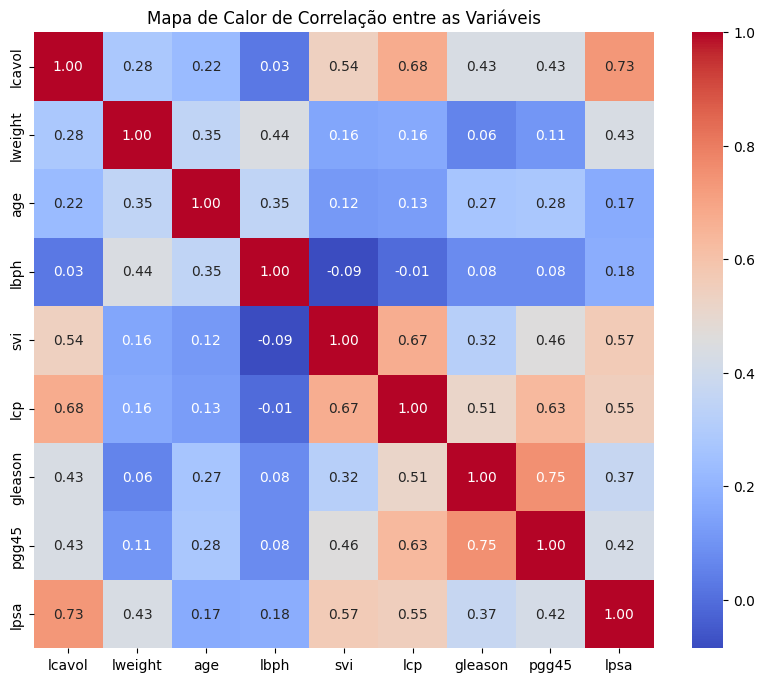

In [ ]:
# calcular a matriz de correlação
matriz_correlacao = dados.corr()

# criar o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlação entre as Variáveis')
plt.show()

## Validação Cruzada

In [ ]:
# selecao das variaveis
cols_x = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
col_y = ['lpsa']

X = dados[cols_x]
y = dados[col_y]

# divisao dos dados
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 20,  random_state = 12345)

- conceito da validação cruzada

In [ ]:
# funcao
crossKfold = KFold(n_splits=5, shuffle=True, random_state = 12345)

# indices dos dados
k = 0
for train, val in crossKfold.split(X_train, y_train):
 k += 1
 print(f'----Kfold: {k}')
 # indices do treino
 print('--Treino')
 print(train)
 # indices da validacao
 print('--Validacao')
 print(val)

----Kfold: 1
--Treino
[ 0  1  3  5  7  8  9 10 11 12 14 15 16 17 18 19 21 22 23 24 26 27 29 31
 32 33 34 35 36 38 39 40 41 42 43 44 45 46 47 49 51 52 53 55 56 57 58 59
 61 63 64 65 66 67 68 69 71 72 74 75 76]
--Validacao
[ 2  4  6 13 20 25 28 30 37 48 50 54 60 62 70 73]
----Kfold: 2
--Treino
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 19 20 23 24 25 27 28
 29 30 31 33 34 36 37 38 39 40 41 42 43 44 46 47 48 49 50 54 55 56 58 59
 60 61 62 63 67 68 70 71 72 73 74 75 76]
--Validacao
[ 9 18 21 22 26 32 35 45 51 52 53 57 64 65 66 69]
----Kfold: 3
--Treino
[ 0  1  2  3  4  5  6  7  9 10 11 13 14 15 18 20 21 22 23 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 41 43 45 47 48 50 51 52 53 54 55 56 57 59
 60 61 62 64 65 66 67 69 70 71 73 74 75 76]
--Validacao
[ 8 12 16 17 19 24 40 42 44 46 49 58 63 68 72]
----Kfold: 4
--Treino
[ 1  2  4  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 24 25 26 28 29
 30 32 34 35 36 37 38 39 40 41 42 43 44 45 46 48 49 50 51 52 53 54 57 58
 59 60 62 63 64 65 

## Regressão Penalizada

- Ridge

In [ ]:
# regressao ridge
alpha_ = 1 # controla o nivel de regularizacao
regressao_ridge = Ridge(alpha = alpha_)
regressao_ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [ ]:
# coeficientes ridge
betas = np.append(regressao_ridge.intercept_, regressao_ridge.coef_)
colunas = ['intercepto']+X.columns.to_list()
coeficientes_ridge = pd.DataFrame(betas, colunas, columns=['Coeficientes'])
coeficientes_ridge

,Coeficientes
intercepto,0.823461
lcavol,0.658057
lweight,0.435113
age,-0.020541
lbph,0.080840
svi,0.740854
lcp,-0.128140
gleason,0.025019
pgg45,0.004476


In [ ]:
# regressao lasso
alpha_ = 1 # controla o nivel de regularizacao
regressao_lasso = Lasso(alpha = alpha_)
regressao_lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [ ]:
# coeficientes Lasso
betas = np.append(regressao_lasso.intercept_, regressao_lasso.coef_)
colunas = ['intercepto']+X.columns.to_list()
coeficientes_lasso = pd.DataFrame(betas, colunas, columns=['Coeficientes'])
coeficientes_lasso

,Coeficientes
intercepto,2.050267
lcavol,0.000000
lweight,0.000000
age,0.000000
lbph,0.000000
svi,0.000000
lcp,0.000000
gleason,0.000000
pgg45,0.018824


In [ ]:
# funcao cross_val_score automatiza todo o processo de cross-validation
alpha_ = 1 # controla o nivel de regularizacao
regressao_ridge = Ridge(alpha = alpha_)
score_ridge = cross_val_score(regressao_ridge, X_train, y_train,
 cv = crossKfold,
 scoring = 'neg_mean_squared_error')
regressao_ridge.fit(X_train, y_train)
np.sqrt(np.mean(-1 * score_ridge))

np.float64(0.7939672135596867)

In [ ]:
# funcao cross_val_score automatiza todo o processo de cross-validation
alpha_ = 1 # controla o nivel de regularizacao
regressao_lasso = Lasso(alpha = alpha_)
score_lasso = cross_val_score(regressao_lasso, X_train, y_train,
 cv = crossKfold,
 scoring = 'neg_mean_squared_error')
regressao_lasso.fit(X_train, y_train)
np.sqrt(np.mean(-1 * score_lasso))

In [ ]:
# otimizar alpha
regressao_ridge_otimizada = RidgeCV(alphas = [0.001, 0.01, 0.1, 0.5, 0.7, 1, 7, 10], cv=crossKfold)
score_ridge_otimizado = cross_val_score(regressao_ridge_otimizada, X_train, y_train,
 cv = crossKfold,
 scoring = "neg_mean_squared_error")
# Valor encontrado por validação cruzada
regressao_ridge_otimizada.fit(X_train, y_train)
regressao_ridge_otimizada.alpha_
np.sqrt(np.mean(-1 * score_ridge_otimizado))

np.float64(0.8488055491133957)

In [ ]:
# otimizar alpha
regressao_lasso_otimizada = LassoCV(alphas = [0.001, 0.01, 0.1, 0.5, 0.7, 1, 7, 10], cv=crossKfold)
score_lasso_otimizado = cross_val_score(regressao_lasso_otimizada, X_train, y_train.values.ravel(),
 cv = crossKfold,
 scoring = "neg_mean_squared_error")
# Valor encontrado por validação cruzada
regressao_lasso_otimizada.fit(X_train, y_train.values.ravel())
regressao_lasso_otimizada.alpha_
np.sqrt(np.mean(-1 * score_lasso_otimizado))

np.float64(0.8425729342728625)

In [ ]:
# gerar previsoes
pred_ridge = regressao_ridge.predict(X_test)
pred_lasso = regressao_lasso.predict(X_test)
pred_ridge_otimizada = regressao_ridge_otimizada.predict(X_test)
pred_lasso_otimizada = regressao_lasso_otimizada.predict(X_test)

In [ ]:
# obter o rmse
rmse_ridge = np.sqrt(mean_squared_error(y_test, pred_ridge))
rmse_lasso = np.sqrt(mean_squared_error(y_test, pred_lasso))
rmse_ridge_otimizada = np.sqrt(mean_squared_error(y_test, pred_ridge_otimizada))
rmse_lasso_otimizada = np.sqrt(mean_squared_error(y_test, pred_lasso_otimizada))

In [ ]:
# apresentar os resultados
print(f'- RMSE Ridge: {rmse_ridge}')
print(f'- RMSE Lasso: {rmse_lasso}')
print(f'- RMSE Ridge otimizada: {rmse_ridge_otimizada}')
print(f'- RMSE Lasso otimizada: {rmse_lasso_otimizada}')

- RMSE Ridge: 0.7425644242703652
- RMSE Lasso: 0.8282172542094777
- RMSE Ridge otimizada: 0.7294197361986285
- RMSE Lasso otimizada: 0.7447580207001858
